<a href="https://colab.research.google.com/github/imilankumar/ColorIdentification/blob/main/Color_Identification_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author : Milan Kumar**

#**Task 2 : Color Identification in Images**

#**GRIP @The Sparks Foundation**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving colors.csv to colors.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving task.jpg to task.jpg


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2304, 3072, 3)


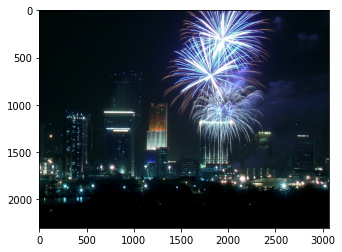

In [4]:
image = cv2.imread('task.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

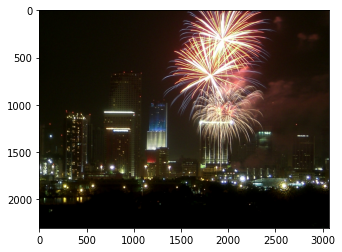

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

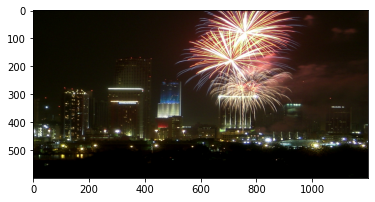

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):

  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

[array([5.1111366 , 4.18153738, 0.38345796]),
 array([78.09794026, 56.93920545, 47.02699372]),
 array([174.81412842, 132.96119045, 117.55423526]),
 array([248.15562914, 243.92154865, 221.3149516 ]),
 array([127.38322136,  89.59724187,  80.94448373]),
 array([46.12773958, 33.15685418, 20.77192616]),
 array([219.40560796, 191.6419434 , 162.84455356]),
 array([26.00597106, 17.7699907 ,  6.66748024])]

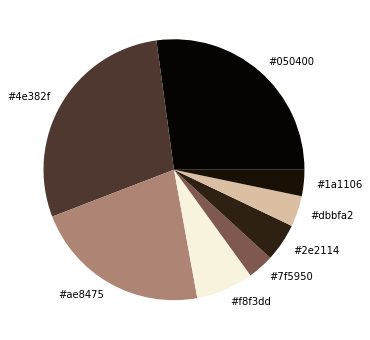

In [10]:
get_colors(get_image('task.jpg'), 8, True)

**Conclusion :**  In this task given by The Sparks Foundation, I am successfully able to carry-out color detection in an image as per requirement.
